# A Short and simple project on face recognation 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

<h1>firstly we have to grab the pictures and get only their faces and save them</h1>

In [ ]:
# lets try to detect the face of a single image first

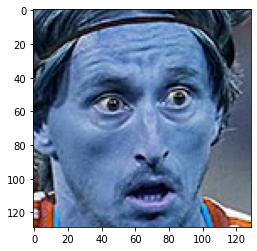

[[160  40 129 129]]


In [19]:
img = cv.imread('./football_players/luka_modric/1ec6be9ae5.jpg')
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cascade = cv.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
face = cascade.detectMultiScale(gray_img, 1.1, 3)

x, y, w, h = face[0]


face_img = img[y:y+h, x:x+w]
plt.imshow(face_img)

plt.show()
print(face)

<h2>This method is not fullproff as it can give us a image which is not correct. To fix this problem we can detect eyes on the face_img and detect if it has two eyes. We will only take a cropped picture if it has two eyes</h2>

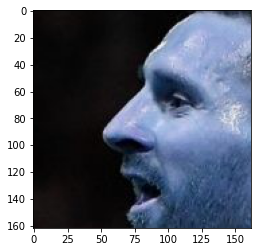

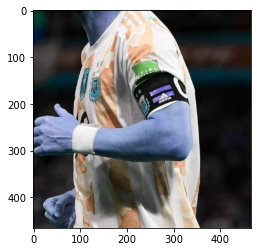

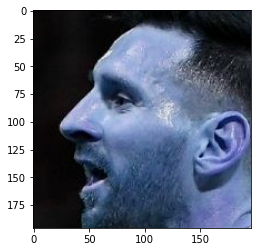

[[412  85 162 162]
 [431 285 466 466]
 [440  72 196 196]]


In [32]:
img = cv.imread('./football_players/lionel_messi/1df2cac625.jpg')
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cascade = cv.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
face = cascade.detectMultiScale(gray_img, 1.1, 3)


for x, y, w, h in face:
    plt.figure()
    face_img = img[y:y+h, x:x+w]
    plt.imshow(face_img)
    plt.show()
    
    
print(face)

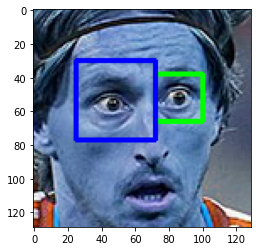

[[160  40 129 129]]
[[72 38 28 28]
 [25 30 47 47]]


In [134]:
img = cv.imread('./football_players/luka_modric/1ec6be9ae5.jpg')
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cascade_face = cv.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
face = cascade_face.detectMultiScale(gray_img, 1.1, 3)

for x, y, w, h in face:
    plt.figure()
    face_img = img[y:y+h, x:x+w]
    
    cascade_eyes = cv.CascadeClassifier("./haarcascades/haarcascade_eye.xml")
    eyes = cascade_eyes.detectMultiScale(face_img)
    if len(eyes) >= 2:
        x1, y1, w1, h1 = eyes[0]
        x2, y2, w2, h2 = eyes[1]
        eye1 = cv.rectangle(face_img, (x1, y1), (x1+w1, y1+h1), color=(0, 255, 0), thickness=2)
        eye2 = cv.rectangle(eye1, (x2, y2), (x2+w2, y2+h2), color=(0, 0, 255), thickness=2)
        plt.imshow(eye2)
        plt.show()
        
    plt.show()

print(face)
print(eyes)

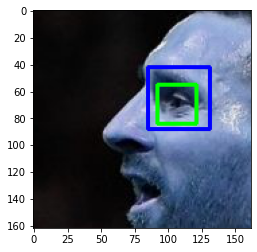

[[412  85 162 162]
 [431 285 466 466]
 [440  72 196 196]]
[[92 55 29 29]
 [85 42 46 46]]


In [146]:
img = cv.imread('./football_players/lionel_messi/1df2cac625.jpg')
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cascade_face = cv.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
face = cascade_face.detectMultiScale(gray_img, 1.1, 3)

for x, y, w, h in face:
    plt.figure()
    face_img = img[y:y+h, x:x+w]
    
    cascade_eyes = cv.CascadeClassifier("./haarcascades/haarcascade_eye.xml")
    eyes = cascade_eyes.detectMultiScale(face_img, 1.1, 3)
    if len(eyes) >= 2:
        x1, y1, w1, h1 = eyes[0]
        x2, y2, w2, h2 = eyes[1]
        eye1 = cv.rectangle(face_img, (x1, y1), (x1+w1, y1+h1), color=(0, 255, 0), thickness=2)
        eye2 = cv.rectangle(eye1, (x2, y2), (x2+w2, y2+h2), color=(0, 0, 255), thickness=2)

        plt.imshow(eye2)
        plt.show()
        
        break
        
    plt.show()

print(face)
print(eyes)

<h2> It seems that our method is working. Now lets make a function which would do all the work together </h2>

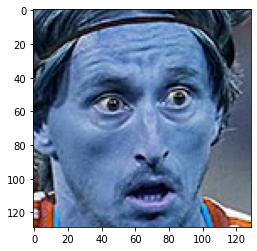

In [8]:
def get_face(img_path):
    img = cv.imread(img_path)
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    cascade_face = cv.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
    face = cascade_face.detectMultiScale(gray_img, 1.1, 5)

    for x, y, w, h in face:
        face_img = gray_img[y:y+h, x:x+w]

        cascade_eyes = cv.CascadeClassifier("./haarcascades/haarcascade_eye.xml")
        eyes = cascade_eyes.detectMultiScale(face_img, 1.2, 3)
        if len(eyes) >= 2:
                return img[y:y+h, x:x+w]
            
    return None

face = get_face('./football_players/luka_modric/1ec6be9ae5.jpg')
plt.imshow(face)
plt.show()

In [111]:
face = get_face('./football_players/lionel_messi/1df2cac625.jpg')
if face is not None:
    plt.imshow(face)
    plt.show()

<Figure size 432x288 with 0 Axes>

<h2>The only problem this function is that it will only grab the first picture and not any other picture</h2>

# WE ARE ALL SET. ALL WE NEED TO DO IS THAT WE DO IT TO ALL THE IMAGES AND SAVE THEM IN A FOLDERS

In [4]:
# first let get access to all the pictures folders

folder_names = []

for folder in os.listdir("football_players"):
    folder_names.append(folder)
    
print(folder_names)

['cristiano_ronaldo', 'lionel_messi', 'luka_modric', 'mohamed_salah', 'ronaldinho']


In [11]:
# now lets go thought all the  all the images and save them in new cropped folder

for folder in folder_names:
    count = 0
    path = './football_players/' + folder
    print(folder)
    for index, image in enumerate(os.listdir(path)):
        image_path = path + "/" + image
        face = get_face(image_path)
        if face is not None:
            cropped_path = './cropped_pictures/'+ folder + str(count) + '.jpg'
            cv.imwrite(cropped_path, face)
            count += 1

<h2> Now we have to get manually delete some images which are not correct as our method was not 100 percent correct</h2>